
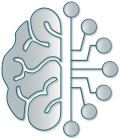

**Début à:** Sunday 03 December 2023, 15:52:28  
**Hostname:** ip-sw-install-nico.insa-toulouse.fr (Linux)

<p style="text-align: center"><img width="800px" src="./config/svg/logoDebut.svg" style="margin-left:auto; margin-right:auto"/></p>

In [142]:
import os
import sys

cwd0 = './config/'
sys.path.append(cwd0)

import visualID as vID
from visualID import color
vID.init(cwd0)

#cancel the "last operation show-up" specific of Jupyter notebooks
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Traitement statistique de données<br>(data science pour débutants)<br><br>*Statistical treatment of data<br>(data science for beginners)*


## Lecture et analyse de la base de données "iris" par la bibliothèque pandas<br><br>*Reading and analyzis of the "iris" database with the pandas library*<br>

<div class="intro">

Ce sujet exploite une base de données souvent utilisée pour l'apprentissage de méthodes statistiques, la base **IRIS** : 
- elle regroupe les caractéristiques de trois espèces de fleurs d’Iris : Setosa, Versicolor et Virginica
- la base regroupe 50 observations par espèce (soit 150 **individus**)
- chaque observation repose sur 4 caractéristiques (c'est-à-dire 4 **variables**): longueur et largeur de sépales ainsi que longueur et largeur de pétales

Un [article wikipedia](https://fr.wikipedia.org/wiki/Iris_de_Fisher) porte sur ce dataset, qui contient à la fois des données numériques (largeur & longueur de pétales et sépales) et descriptives (types d'iris).
<p style="text-align: center"><img width="500px" src="./DS4B-iris-images/iris.png" style="margin-left:auto; margin-right:auto" id="img_iris"></img></p></div>

<div class="introE">

This subject uses a database often used for the training of statistical methods, the **IRIS** database:
- it gathers the characteristics of three species of flowers of Iris: Setosa, Versicolor and Virginica
- the database contains 50 observations per species (*i.e.* 150 **individuals**)
- each observation is based on 4 characteristics (*i.e.* 4 **variables**): length and width of sepals and length and width of petals

A [wikipedia article](https://en.wikipedia.org/wiki/Iris_flower_data_set) is about this dataset, which contains both numerical (width & length of petals and sepals) and descriptive (iris types) data.</div></div>

<p style="text-align: center"><img width="200px" src="DS4B-svg/Pandas_logo.svg" style="margin-left:auto; margin-right:auto" id="img_fct1"/></p>

<div class="intro">
    
- `pandas` est une bibliothèque python qui permet de **manipuler facilement des données** et des les **analyser**
- elle permet en particulier de manipuler des tableaux de données incluant des étiquettes de variables (colonnes) et d'individus (lignes)
- ces **tableaux** sont appelés *DataFrames*
- un dataframe `pandas` peut être vu comme une feuille de calcul programmable
- on peut facilement lire et écrire ces dataframes à partir ou vers un fichier tabulé (formats **excel**, **[csv](https://fr.wikipedia.org/wiki/Comma-separated_values)**, etc)
- on peut faciler **tracer des graphes** à partir de ces DataFrames grâce à `matplotlib`, ou bien à l'aide d'autres bibliothèques dédiées à l'analyse statistique de données.

</div>
<br>
<div class="rq">
    
Comme pour toute bibliothèque python qui apporte des commandes et fonctionalités avancées avec leur syntaxe et logique propre, on n'hésitera pas à utiliser une <b>"Cheat Sheet"</b>, et à faire des copier/coller des principales commandes (inutile de s'encombrer le cerveau avec une syntaxe complexe). Il en existe plusieurs pour pandas, dont  une <a href="https://github.com/pandas-dev/pandas/blob/main/doc/cheatsheet/Pandas_Cheat_Sheet.pdf">Cheat Sheet officielle, télécheargeable</a>.

</div>
<br>
<br>

<div class="introE">

- `pandas` is a python library that allows to **easily manipulate data** and to **analyze** them
- it allows in particular to manipulate data sheets with labelled variables (columns) and samples (rows)
- these **tables** are called *DataFrames*
- you can think of `pandas` DataFrame as a programmable spreadsheet
- you can easily read and write these dataframes from or to a tabulated file (**excel**, **[csv](https://en.wikipedia.org/wiki/Comma-separated_values)**, etc)
- one can easily obtain plots from these DataFrames with `matplotlib`, or with other libraries dedicated to statistical data analysis.

</div>
<br>
<div class="rqE">
    
As for any python library that brings advanced commands and features with their own syntax and logic, don't hesitate to use a "Cheat Sheet", and to copy/paste the main commands (no need to clutter your brain with complex syntax). There are several Cheat Sheets for pandas, including an <a href="https://github.com/pandas-dev/pandas/blob/main/doc/cheatsheet/Pandas_Cheat_Sheet.pdf">official, downloadable Cheat Sheet</a>.

</div>

In [2]:
%matplotlib inline
# la bibliothèque pylab est très utile pour de la programmation scientifique avec python
# 
from pylab import *
# importation des bibliothèques pandas & seaborn
# importation of the pandas & seaborn libraries
import pandas as pd
import seaborn as sns

<div class="rq">
    
**Pourquoi le raccourci `sns` est-il utilisé pour `seaborn` ?** 
Il rend hommage à [Samuel Norman Seaborn](https://en.wikipedia.org/wiki/Sam_Seaborn), un des personnages de la série télévisée [The West Wing](https://en.wikipedia.org/wiki/The_West_Wing). En revanche la raison pour laquelle la bibliothèque s'appelle `seaborn` semble obscure. 

</div>
<div class="rqE">
    
**Why is the shortcut sns used for seaborn?** It is a tribute to [Samuel Norman Seaborn](https://en.wikipedia.org/wiki/Sam_Seaborn), one of the characters in the television series [The West Wing](https://en.wikipedia.org/wiki/The_West_Wing). Why the library is called seaborn, however, seems unclear.

</div>

### Lecture des données<br>*Reading of data*

<div class="intro">

On va d'abord lire le fichier dans un nouvel onglet jupyter, simplement en cliquant sur <a href="./DS4B-iris-data/iris.csv" target="_blank">ce lien</a>, puis on va utiliser la fonction read_csv de pandas.
<br> Vous pouvez voir dans l'onglet qu'il s'agit d'un fichier qui contient un en-tête, puis des données. Tous les éléments sont séparés par le délimiteur ";". Sélectionnez le délimiteur ";" pour mieux voir la structuration du fichier csv.
</div>
<p style="text-align: center"><img width="150px" src="./DS4B-iris-images/delimiter.png" style="margin-left:auto; margin-right:auto" id="img_iris"></img></p></div>
<div class="introE">

First, we'll read the file in a new tab, simply by clicking on <a href="./DS4B-iris-data/iris.csv" target="_blank">this link</a>, then we'll use the read_csv function of pandas.
<br>You can see from the tab that this is a file containing a header, then data. All the elements are separated by the ";" delimiter. Select the ";" delimiter to see how the csv file is structured.
</div>
<br>
<div class="intro">

Maintenant qu'on a compris la structure d'un fichier texte de type csv, chargeons ses données dans un dataframe pandas
</div>
<div class="introE">

Now that we've understood the structure of a csv text file, let's load its data into a pandas dataframe
</div>

In [3]:
# on utilise la fonction read_csv de la librariries pandas (aka pd)
pd.read_csv('./DS4B-iris-data/iris.csv', sep=";")

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


<div class="intro">


On va maintenant stocker ces données dans un *dataframe* `Pandas`, qu'on va appeler `dfi` (comme DataFrame Iris). C'est un type de données tabulées, c'est-à-dire à 2 dimensions, voir Figure ci-dessous.

- **lignes**
    - chaque **ligne** représente un *échantillon*. Dans le domaine de l'apprentissage automatique ou des statistiques descriptives, les termes équivalents couramment utilisés sont *enregistrement*, *instance* ou *observation*.
    - chaque **ligne** est repérée par un index personnalisable. Par défaut, l'index est un nombre entier contenu entre 0 et *N*-1 (*N* = nombre d'échantillons)

- **colonnes**
    - Chaque **colonne** représente un type d'information qui a été collecté et est appelée *caractéristique*. Dans le domaine de l'apprentissage automatique et des statistiques descriptives, les termes équivalents couramment utilisés sont *variable*, *attribut* ou ***descripteur***. Ce peut être un nombre, du texte, un booléen, une date, etc...
    - Une **série `Pandas`** est comme une colonne dans un tableau. Il s'agit d'un tableau unidimensionnel contenant des données de n'importe quel type. L'étiquette de l'index peut être personnalisée.
</div>

<p style="text-align: center"><img width="500px" src="DS4B-svg/PandasDataframe.svg" style="margin-left:auto; margin-right:auto" id="img_pandas_df"/></p>

<div class="introE">


We will now store these data in a `Pandas` *dataframe*, which we will call `dfi` (like DataFrame Iris). It is a 2-dimensional data structure, see above figure.

- **rows**
    - Each **row** represents a sample. In the field of machine learning or descriptive statistics, the equivalent terms commonly used are *record*, *instance* or *observation*.
    - Each **row** is marked by a customizable index. The default index is an integer number between 0 and *N*-1 (*N* = number of samples)

- **columns**
    - Each **column** represents a type of information that has been collected and is called a *feature*. In machine learning and descriptive statistics, the equivalent terms commonly used are *variable*, *attribute* or ***descriptor***. I can be a number, a string, a boolean, a date, ...
    - A **`Pandas` series** is like a column in a table. It is a one-dimensional array holding data of any type. The index label can be personalized. 
</div>

In [4]:
# même chose que précédemment, mais on sauve dans une variable dfi (comme dataframe iris)
# same as above, but saved in a dfi variable (like dataframe iris)

dfi=pd.read_csv('./DS4B-iris-data/iris.csv', sep=";")

# cette fois-ci rien n'est affiché. On va pour dela utiliser la fonction display
# qui est une fonction standard (fournie par IPython.display)

# this time nothing is displayed. So we'll use the display function
# which is a standard function (provided by IPython.display)

display(dfi)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


<div class="rq">
    <b>attention</b>: les <i>colonnes</i> sont indexées par leur nom et les <i>lignes</i> par les index entiers 0 à 149. Chacun des 150 échantillons est donc indexé par un nombre entier
</div>
<div class="rqE">

<b>attention</b>: *columns* are indexed by their name whereas rows by the integer indexes 0 to 149. Each of the 150 samples is therefore indexed by an integer

</div>

### Manipulations simples des données<br>*Simple data manipulation*

#### Mise en évidence de la structuration des données en tableaux<br>*Highlighting the structuring of data in tables*

<div class="intro">

La commande `NomDuDataFrame.to_numpy()` renvoie la structure matricielle d'un data frame sous forme de liste, tel que `numpy` code les tableaux (ou *<b>matrices</b>) de données

</div>
<div class="introE">

The `NameDuDataFrame.to_numpy()` command returns the matrix structure of a data frame as a list, the encoding type of arrays (or **matrices**) of data by `numpy`

</div>

In [5]:
dfi.to_numpy()

array([[5.1, 3.5, 1.4, 0.2, 'setosa'],
       [4.9, 3.0, 1.4, 0.2, 'setosa'],
       [4.7, 3.2, 1.3, 0.2, 'setosa'],
       [4.6, 3.1, 1.5, 0.2, 'setosa'],
       [5.0, 3.6, 1.4, 0.2, 'setosa'],
       [5.4, 3.9, 1.7, 0.4, 'setosa'],
       [4.6, 3.4, 1.4, 0.3, 'setosa'],
       [5.0, 3.4, 1.5, 0.2, 'setosa'],
       [4.4, 2.9, 1.4, 0.2, 'setosa'],
       [4.9, 3.1, 1.5, 0.1, 'setosa'],
       [5.4, 3.7, 1.5, 0.2, 'setosa'],
       [4.8, 3.4, 1.6, 0.2, 'setosa'],
       [4.8, 3.0, 1.4, 0.1, 'setosa'],
       [4.3, 3.0, 1.1, 0.1, 'setosa'],
       [5.8, 4.0, 1.2, 0.2, 'setosa'],
       [5.7, 4.4, 1.5, 0.4, 'setosa'],
       [5.4, 3.9, 1.3, 0.4, 'setosa'],
       [5.1, 3.5, 1.4, 0.3, 'setosa'],
       [5.7, 3.8, 1.7, 0.3, 'setosa'],
       [5.1, 3.8, 1.5, 0.3, 'setosa'],
       [5.4, 3.4, 1.7, 0.2, 'setosa'],
       [5.1, 3.7, 1.5, 0.4, 'setosa'],
       [4.6, 3.6, 1.0, 0.2, 'setosa'],
       [5.1, 3.3, 1.7, 0.5, 'setosa'],
       [4.8, 3.4, 1.9, 0.2, 'setosa'],
       [5.0, 3.0, 1.6, 0.

#### Accès à des lignes ou à des colonnes<br>*Accessing rows or columns*

##### Accès par index ou par nom<br>*Index or name-based acess*

<div class="intro">
On peut adresser chaque colonne par son index d'en-tête, c'est-à-dire son nom.
</div>
<div class="rq">

- Attention à écrire le nom sans erreur et en <b>respectant la casse</b>
- Par défaut, seules les 5 premières et 5 dernières lignes sont affichées

</div>
<br>
<div class="introE">
Each column can be addressed by its header index, i.e. its name.
</div>
<div class="rqE">
    
- Be careful to write the name without error and <b>case sensitive</b>
-  Only the first and last 5 lines are displayed

</div>

In [6]:
dfi["sepal_length"]

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal_length, Length: 150, dtype: float64

<div class="exE" title="Address a specific content of the dfi dataframe">

Display the `dfi` dataframe column that contains the petal width
</div>

In [7]:
# insert your code here


<div class="sol">

Want to see a possible answer? Uncomment the `# %load ./SolutionsToExercises/...` command below, and then run the cell
</div>

In [8]:
# %load ./SolutionsToExercises/DS4B/PetalWidth.py

<div class="intro">La commande suivante permet d'afficher les 3 premières lignes du tableau (<span style="color:red">on rappelle que les lignes sont indexées par des nombres</span>)</div>
<div class="introE">The following command displays the first 3 lines of the table (<span style="color:red">remember that the lines are indexed by numbers</span>)</div>

In [9]:
dfi[0:3]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


<div class="exE" title="Display a selection of lines">

Display the last 10 lines of the `dfi` dataframe
</div>

In [10]:
# insert your code here


<div class="sol">

Want to see a possible answer? Uncomment the `# %load ./SolutionsToExercises/...` command below, and then run the cell
</div>

In [11]:
# %load ./SolutionsToExercises/DS4B/Last10Lines.py

<div class="intro">

On va maintenant accéder aux 3 premières valeurs de la colonne `petal_length`

</div>
<div class="introE">

We will now access the first 3 values of the `petal_length` column
    
</div>

In [12]:
dfi["petal_length"][0:3]

0    1.4
1    1.4
2    1.3
Name: petal_length, dtype: float64

<div class="intro">

Grâce à `iloc`, il est aussi possible d'accéder à une sélection d'un dataframe par les indices des lignes et de colonnes

</div>
<div class="introE">

Thanks to `iloc`, it is also possible to access a selection of a dataframe using the row and column indices
    
</div>

In [33]:
dfi.iloc[0]
dfi.iloc[0:3]
dfi.iloc[0:3,0]

sepal_length       5.1
sepal_width        3.5
petal_length       1.4
petal_width        0.2
species         setosa
Name: 0, dtype: object

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


0    5.1
1    4.9
2    4.7
Name: sepal_length, dtype: float64

<div class="exE" title="'Slicing' of a dataframe">

Display the last 10 petal widths of the `dfi` dataframe
</div>

In [10]:
# insert your code here


<div class="sol">

Want to see a possible answer? Uncomment the `# %load ./SolutionsToExercises/...` command below, and then run the cell
</div>

In [45]:
# %load ./SolutionsToExercises/DS4B/Last10PetalWidths.py

##### Sélection conditionnelle de données<br>*Conditional selection of data*

<div class="intro"><b>Plus fort.</b> On peut fabriquer un nouveau dataframe sur la base d'une condition</div>
<br><div class="introE"><b>Even better.</b> We can make a new dataframe based on a condition</div>

In [13]:
print(dfi["petal_width"] < 2)
dfi_short_petals = dfi[(dfi["petal_width"] < 2)]
display(dfi_short_petals)

0       True
1       True
2       True
3       True
4       True
       ...  
145    False
146     True
147    False
148    False
149     True
Name: petal_width, Length: 150, dtype: bool


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
137,6.4,3.1,5.5,1.8,virginica
138,6.0,3.0,4.8,1.8,virginica
142,5.8,2.7,5.1,1.9,virginica
146,6.3,2.5,5.0,1.9,virginica


<div class="exE" title="Selection by logical conditions">

Make a new `dfi_new` dataframe that contains all irises which petal length and width are greater than 5 cm and 2 cm, respectively.

*Hints*:
- To filter rows based on multiple conditions, apply the &, |, and ~ operators for AND, OR, and NOT
- Use () to separate the conditions.
</div>

In [14]:
# insert your code here


<div class="sol">

Want to see a possible answer? Uncomment the `# %load ./SolutionsToExercises/...` command below, and then run the cell
</div>

In [36]:
# %load ./SolutionsToExercises/DS4B/LogicalCondition.py

##### Extraction d'un sous-ensemble de données à l'aide de `query`<br>*Extracting a subset from a DataFrame, using `query`*

<div class="intro">
    
    
`query`  est une méthode alternative où les conditions d'extraction d'un sous-ensemble d'un DataFrame sont précisées sous forme de chaîne de caractères</div>
<div class="introE">
    
`query` is an alternate string-based syntax for extracting a subset from a DataFrame</div>

In [16]:
dfi.query("petal_width < 2")

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
137,6.4,3.1,5.5,1.8,virginica
138,6.0,3.0,4.8,1.8,virginica
142,5.8,2.7,5.1,1.9,virginica
146,6.3,2.5,5.0,1.9,virginica


In [17]:
dfi.query("species == 'virginica'")

,sepal_length,sepal_width,petal_length,petal_width,species
100,6.3,3.3,6.0,2.5,virginica
101,5.8,2.7,5.1,1.9,virginica
102,7.1,3.0,5.9,2.1,virginica
103,6.3,2.9,5.6,1.8,virginica
104,6.5,3.0,5.8,2.2,virginica
105,7.6,3.0,6.6,2.1,virginica
106,4.9,2.5,4.5,1.7,virginica
107,7.3,2.9,6.3,1.8,virginica
108,6.7,2.5,5.8,1.8,virginica
109,7.2,3.6,6.1,2.5,virginica


In [18]:
dfi.query("species == 'virginica' and petal_length >= 6 ")

,sepal_length,sepal_width,petal_length,petal_width,species
100,6.3,3.3,6.0,2.5,virginica
105,7.6,3.0,6.6,2.1,virginica
107,7.3,2.9,6.3,1.8,virginica
109,7.2,3.6,6.1,2.5,virginica
117,7.7,3.8,6.7,2.2,virginica
118,7.7,2.6,6.9,2.3,virginica
122,7.7,2.8,6.7,2.0,virginica
125,7.2,3.2,6.0,1.8,virginica
130,7.4,2.8,6.1,1.9,virginica
131,7.9,3.8,6.4,2.0,virginica


<div class="exE" title="Selection with the query command">

Make and then display a new `dfi_newQuery` dataframe that contains all irises which petal length and width are greater than 5 cm and 2 cm, respectively.

*Hints*:
- To filter rows based on multiple conditions, apply the `and`, `or` or `not` operators 
- You don't have to use () to separate the conditions.
</div>

In [19]:
# insert your code here


<div class="sol">

Want to see a possible answer? Uncomment the `# %load ./SolutionsToExercises/...` command below, and then run the cell
</div>

In [20]:
# %load ./SolutionsToExercises/DS4B/LogicalConditionQuery.py

<div class="rq">
    
`query` est plus pratique et lisible que la sélection par des tests conditionnels
</div>
<div class="rqE">
    
`query` is more convenient and easier to read than selecting using conditional tests
</div>


#### Opérations<br>*Operations*

##### Tri<br>*Sorting*

<div class="intro">On peut <b>trier</b> les données par ordre croissant ou décroissant</div>
<div class="introE">Data can be <b>sorted</b> in ascending or descending order</div>

In [21]:
dfi.sort_values(by="petal_length", ascending = True)

,sepal_length,sepal_width,petal_length,petal_width,species
22,4.6,3.6,1.0,0.2,setosa
13,4.3,3.0,1.1,0.1,setosa
14,5.8,4.0,1.2,0.2,setosa
35,5.0,3.2,1.2,0.2,setosa
36,5.5,3.5,1.3,0.2,setosa
...,...,...,...,...,...
131,7.9,3.8,6.4,2.0,virginica
105,7.6,3.0,6.6,2.1,virginica
117,7.7,3.8,6.7,2.2,virginica
122,7.7,2.8,6.7,2.0,virginica


<div class="rq">
Notez que les index de lignes sont triés eux-aussi.<br>
Ça peut sembler secondaire, mais c'est important car ça sert d'<b>identifiant de l'échantillon</b> 
</div>
<div class="rqE">
Note that the row indexes are sorted as well.<br>
This may seem anecdotic, but it is important because it can be used as a <b>sample ID</b>
</div>

##### Opérations de base<br>*Basic operations*
<div class="intro">On peut aussi appliquer une <b>opération arithmétique</b> à un dataframe</div>
<div class="introE">We can also apply an arithmetic operation to a dataframe</div>

In [22]:
dfi*3

,sepal_length,sepal_width,petal_length,petal_width,species
0,15.3,10.5,4.2,0.6,setosasetosasetosa
1,14.7,9.0,4.2,0.6,setosasetosasetosa
2,14.1,9.6,3.9,0.6,setosasetosasetosa
3,13.8,9.3,4.5,0.6,setosasetosasetosa
4,15.0,10.8,4.2,0.6,setosasetosasetosa
...,...,...,...,...,...
145,20.1,9.0,15.6,6.9,virginicavirginicavirginica
146,18.9,7.5,15.0,5.7,virginicavirginicavirginica
147,19.5,9.0,15.6,6.0,virginicavirginicavirginica
148,18.6,10.2,16.2,6.9,virginicavirginicavirginica


<div class="intro">
Regardez la colonne <code>species</code>...<br>
On ne veut appliquer cette opération qu'aux colonnes 0 à 4 <br>
On va pour ça :
<li> copier <code>dfi</code> dans un nouveau dataframe (à l'aide de la méthode <code>.copy()</code>)
<li> faire une boucle en utilisant l'attribut <code>columns</code>
<li> appliquer l'opération à chaque colonne 
</div>
<div class="introE">
Look at the <code>species</code> column...<br>
We want to apply this operation only to the columns 0 to 4<br>
To do this, we will :
<li> copy <code>dfi</code> into a new dataframe (using the <code>.copy()</code> method)
<li> make a loop using the <code>columns</code> attribute
<li> apply the operation to each column
</div>

In [23]:
#on regarde d'abord ce que fait l'attribut columns()
#first we look at what the columns() attribute does
dfi.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [25]:
# copie de dfi en tant que nouveau dataframe dfi3
# si on avait fait df3=dfi, les deux pointeraient vers le même tableau!
# toute opération sur l'un se répercuterait sur l'autre

# copy dfi as a new dataframe dfi3
# if we had done df3=dfi, both would point to the same array!
# any operation on one would be reflected on the other
dfi3=dfi.copy()

# maintenant on boucle / loop
for col in dfi3.columns[0:4]:
    dfi3[col]=dfi[col]*3
    
display(dfi3)
display(dfi)

,sepal_length,sepal_width,petal_length,petal_width,species
0,15.3,10.5,4.2,0.6,setosa
1,14.7,9.0,4.2,0.6,setosa
2,14.1,9.6,3.9,0.6,setosa
3,13.8,9.3,4.5,0.6,setosa
4,15.0,10.8,4.2,0.6,setosa
...,...,...,...,...,...
145,20.1,9.0,15.6,6.9,virginica
146,18.9,7.5,15.0,5.7,virginica
147,19.5,9.0,15.6,6.0,virginica
148,18.6,10.2,16.2,6.9,virginica


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


##### Appliquer une fonction à une série et insérer le résultat comme une nouvelle colonne<br>*Apply a function to a series and insert the result as a new column*

<div class="intro">

On va rajouter une colonne `DFlower`, qui va contenir le diamètre d'une fleur d'iris. Il est simplement obtenu comme le double de la longueur de son sépale, qui est généralement plus long qu'un pétale. On va appliquer (`apply`) une fonction `diameterFlower` qui va prendre la longueur d'un sépale comme argument et va renvoyer cette valeur x 2.

</div>
<div class="introE">
    
Let's add a `DFlower` column, with the diameter of each iris sample. It is easily calculated as twice the length of its sepal, usually longer than a petal. It is simply obtained as twice the length of its sepal, which is usually longer than a petal. We will apply (`apply`) a `diameterFlower` function which will take the length of a sepal as argument and return this value x 2.

</div>

In [52]:
dfiDum=dfi.copy()

def diameterFlowerA(sl):
    return sl*2

dfiDum["DFlower"] = dfiDum[["sepal_length"]].apply(diameterFlowerA, axis=0)
display(dfiDum)

,sepal_length,sepal_width,petal_length,petal_width,species,DFlower
0,5.1,3.5,1.4,0.2,setosa,10.2
1,4.9,3.0,1.4,0.2,setosa,9.8
2,4.7,3.2,1.3,0.2,setosa,9.4
3,4.6,3.1,1.5,0.2,setosa,9.2
4,5.0,3.6,1.4,0.2,setosa,10.0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,13.4
146,6.3,2.5,5.0,1.9,virginica,12.6
147,6.5,3.0,5.2,2.0,virginica,13.0
148,6.2,3.4,5.4,2.3,virginica,12.4


<div class="rq">

- attention à la syntaxe `dfiDum[["sepal_length"]]`, avec deux `[[` et `]]`
- ci-dessous un petit rappel de la signification de `axis`, sous forme de schéma. Dans le contexte de `apply`, `axis` signifie:
    - 0 ou 'index': applique la fonction à chaque colonne (c'est-à-diire que la fonction s'applique à toute la colonne d'un coup))
    - 1 ou 'columns' : applique la fonction à chaque ligne 

</div>

<div class="rqE">
    
- mind the `dfiDum[["sepal_length"]]` syntax, with two `[[` and `]]`
- Below is a quick schematic reminder of the meaning of `axis`. In the context of the `apply` function, `axis` means:
    - 0 or 'index': apply function to each column (*i.e* `apply` applies to the whole selection at once)
    - 1 or 'columns': apply function to each row

</div>

<p style="text-align: center"><img width="500px" src="DS4B-svg/PandasDataframe.svg" style="margin-left:auto; margin-right:auto" id="img_pandas_df"/></p>

<div class="intro">

Considérons maintenant la possibilité qu'un pétale puisse être plus long qu'on sépale. Il faut adapter la fonction `diameterFlower` précedente. Les valeurs de la nouvelle colonne `DFlower` doivent être calculées `max(sepal_length,petal_length) x 2`. Une solution simple est de transmettre les deux valeurs à `diameterFlower` comme un argument unique, c'est-à-dire un vecteur. 

</div>
<div class="introE">
    
We are now considering the possibility that a petal could be longer than a sepal. The previous `diameterFlower` must be adapted. The  values of the newly created `DFlower` column must be calculated as `max(sepal_length,petal_length) x 2`. A simple solution is to pass to `diameterFlower` the two values as a single argument, *i.e.* a vector..

</div>

In [28]:
dfiDum=dfi.copy()

def diameterFlowerB(vector):
    import numpy as np
    return np.maximum(vector.iloc[0],vector.iloc[1])*2

dfiDum["DFlower"] = dfiDum[["sepal_length","petal_length"]].apply(diameterFlowerB,axis=1)
display(dfiDum)

,sepal_length,sepal_width,petal_length,petal_width,species,DFlower
0,5.1,3.5,1.4,0.2,setosa,10.2
1,4.9,3.0,1.4,0.2,setosa,9.8
2,4.7,3.2,1.3,0.2,setosa,9.4
3,4.6,3.1,1.5,0.2,setosa,9.2
4,5.0,3.6,1.4,0.2,setosa,10.0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,13.4
146,6.3,2.5,5.0,1.9,virginica,12.6
147,6.5,3.0,5.2,2.0,virginica,13.0
148,6.2,3.4,5.4,2.3,virginica,12.4


<div class="rq">
C'est parmi les fonctions les plus utiles pour manipuler des dataframes et appliquer des opérations complexes à tout un ensemble de données contenues dans une ou plusieurs colonnes
</div>
<div class="rqE">
This is one of the most useful functions for manipulating dataframes and applying complex operations to an entire set of data contained in one or more columns.
</div>

<div class="exE" title="Use of the df.apply function (*** exercise. Skip it in the first place)">

- copy `dfi` into as a new `dfi_ohe` dataframe (ohe is for [one hot encoding](https://en.wikipedia.org/wiki/One-hot))
- convert setosa, versicolor and virginica as tuples (1,0,0), (0,1,0) and (0,0,1), respectively and store these tuples in a new `Probability` column
- display `dfi_ohe`

*Hint*: first analyze the codes below and their output
</div>

In [124]:
dfi_demo=dfi.iloc[[0,50,100]].copy()
dfi_demo
def demo1(sp):
    print(sp,sp=='setosa')
    return sp
dfi_demo["demo1"] = dfi_demo[["species"]].apply(demo1, axis=1)
print()
def demo2(sp):
    print(sp.iloc[0],sp.iloc[0]=='setosa')
    return sp.iloc[0]
dfi_demo["demo2"] = dfi_demo[["species"]].apply(demo2, axis=1)
print()
def demo3(sp):
    print(sp,sp=='setosa')
    return sp
dfi_demo["demo3"] = dfi_demo[["species"]].apply(demo3, axis=0)
dfi_demo

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
50,7.0,3.2,4.7,1.4,versicolor
100,6.3,3.3,6.0,2.5,virginica


species    setosa
Name: 0, dtype: object species    True
Name: 0, dtype: bool
species    versicolor
Name: 50, dtype: object species    False
Name: 50, dtype: bool
species    virginica
Name: 100, dtype: object species    False
Name: 100, dtype: bool

setosa True
versicolor False
virginica False

0          setosa
50     versicolor
100     virginica
Name: species, dtype: object 0       True
50     False
100    False
Name: species, dtype: bool


,sepal_length,sepal_width,petal_length,petal_width,species,demo1,demo2,demo3
0,5.1,3.5,1.4,0.2,setosa,setosa,setosa,setosa
50,7.0,3.2,4.7,1.4,versicolor,versicolor,versicolor,versicolor
100,6.3,3.3,6.0,2.5,virginica,virginica,virginica,virginica


In [19]:
# insert your code here


<div class="sol">

Want to see a possible answer? Uncomment the `# %load ./SolutionsToExercises/...` command below, and then run the cell
</div>

In [131]:
# %load ./SolutionsToExercises/DS4B/ohe.py

### Analyse graphique des données<br>*Graphical data analysis*

#### Fonctions/*Functions* `describe` & `value_counts` (bibliothèque/*library pandas*)

<div class="intro">

On va en premier lieu faire une analyse statistique de chacune des colonnes.

Dans la syntaxe ci-dessous, on exploite la possibilité d'appliquer une fonction à une variable (c'est ce qu'on appelle la programmation orienté objet). C'est toujours sur le modèle `nomVariable.fonction()`. La commande `dfi.describe(options)` consiste à appliquer la fonctionnalité de calcule des données statistiques descriptives de chaque colonne qui contient des données numériques - telles que le nombre de données, la moyenne, l’écart type, la valeur minimale et maximale, ainsi que les [quartiles](https://fr.wikipedia.org/wiki/Quartile).</div>
<div class="introE">

First, we will do a statistical analysis of each column.

In the syntax below, we exploit the possibility of applying a function to a variable (this is called object-oriented programming). It is always written as `nameVariable.function()`. The `dfi.describe(options)` command is to apply the functionality of calculating descriptive statistical data for each column that contains numerical data - such as the number of data, the mean, the standard deviation, the minimum and maximum value, as well as the [quartiles](https://en.wikipedia.org/wiki/Quartile).
</div>

In [132]:
display(dfi.describe())

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<div class="rq">
Les sépales sont en moyenne plus longs et plus larges que les pétales, ce qui est cohérent avec la <a href="#img_iris">figure de l'introduction</a>.
</div>
<div class="rqE">
    
Sepals are on average longer and wider than petals, which is consistent with the <a href="#img_iris">figure in the introduction.</a>.
</div>

<div class="intro">

Y a-t-il bien 50 espèces de chaque??<br>
`value_counts("série")` compte le nombre de chaque valeur unique au sein de la série
</div>
<div class="introE">

Are there really 50 of each?<br>
`value_counts("Series")` counts the number of times each unique value occurs within the Series
</div>


In [133]:
dfi.value_counts("species")

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

#### Fonction/*Function* `hist` (bibliothèque/*library* pandas)

<div class="intro">

On va maintenant utiliser la fonction [`hist`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html) de `pandas`.  
Elle permet de rapidement voir pour chaque propriété :
- sur quelle gamme de valeurs elle s'étend
- et quelle est la distribution des valeurs
</div>
<div class="introE">

We are now going to use the function hist of pandas.
It allows to quickly see for each property :

- over which range of values it extends
- and what is the distribution of the values</div>

array([[<Axes: title={'center': 'sepal_length'}>,
        <Axes: title={'center': 'sepal_width'}>],
       [<Axes: title={'center': 'petal_length'}>,
        <Axes: title={'center': 'petal_width'}>]], dtype=object)

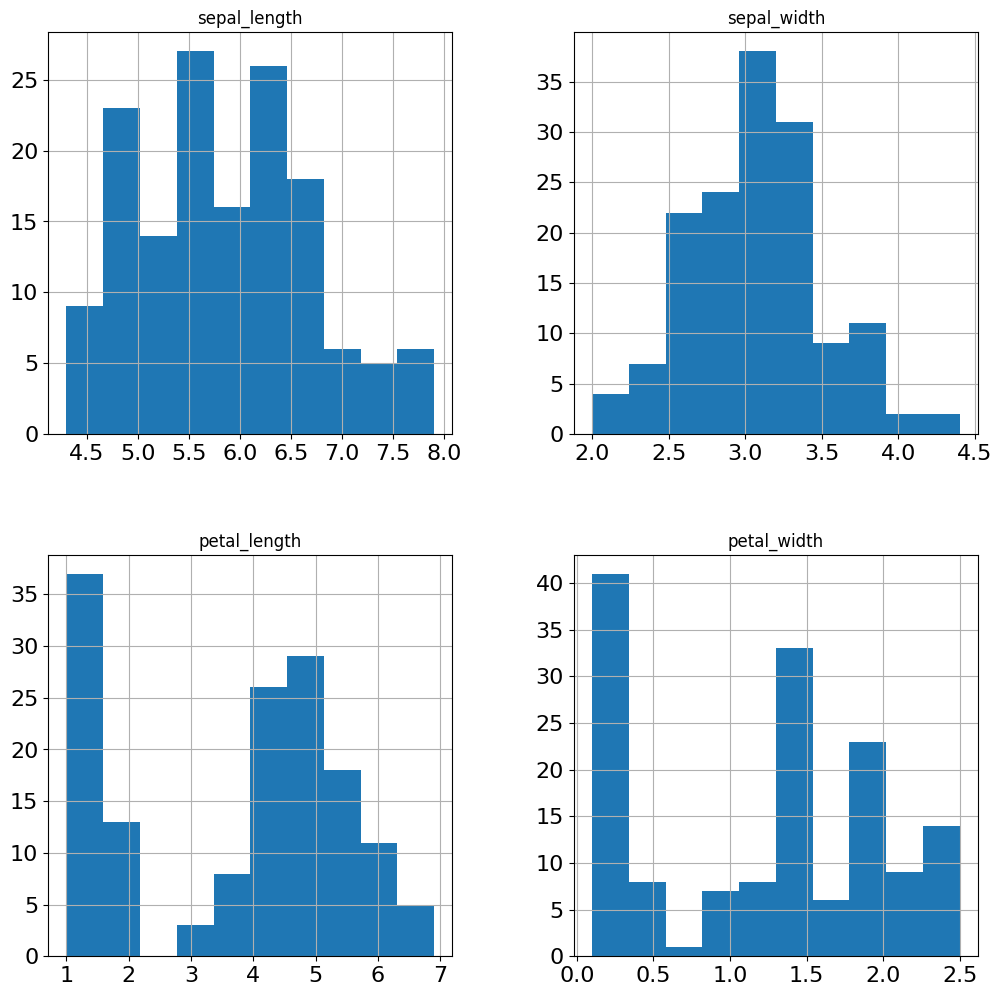

In [134]:
dfi.hist(figsize=(12,12),xlabelsize=16,ylabelsize=16)

#### Fonction/*Function* `jointplot` (bibliothèque/*library* seaborn)

<div class="intro">
    
`Seaborn` est une bibliothèque permettant de créer des graphiques statistiques en Python. Elle est basée sur `matplotlib`, et s’intègre très bien avec `pandas`.
La fonction `jointplot` permet de tracer la distribution jointe de deux caractéristiques. On va par exemple regarder s'il y a une corrélation entre la longueur d'un pétale et sa largeur, ainsi qu'entre la largeur et la longueur d'un sépale. 
</div>
<div class="introE">

`Seaborn` is a library for creating statistical graphs in Python. It is based on `matplotlib`, and works very well with `pandas`. The `jointplot` function allows to plot the joint distribution of two characteristics. For example, we will look if there is a correlation between the length of a petal and its width, and between the width and the length of a sepal.
</div>
<br>
<div class="rq">
Encore une fois, on n'hésitera pas à utiliser une <b>"Cheat Sheet"</b> pour faire des copier/coller des principales commandes. Il en existe plusieurs pour seaborn, dont  la <a href="http://datacamp-community-prod.s3.amazonaws.com/263130e2-2c92-4348-a356-9ed9b5034247">Cheat Sheet  de DataCamp, télécheargeable</a>.
</div>
<div class="rqE">

Once again, don't hesitate to use a "Cheat Sheet" to copy/paste the main commands. There are several of them for seaborn, including the <a href="http://datacamp-community-prod.s3.amazonaws.com/263130e2-2c92-4348-a356-9ed9b5034247">DataCamp Cheat Sheet</a>, which is downloadable.
</div>

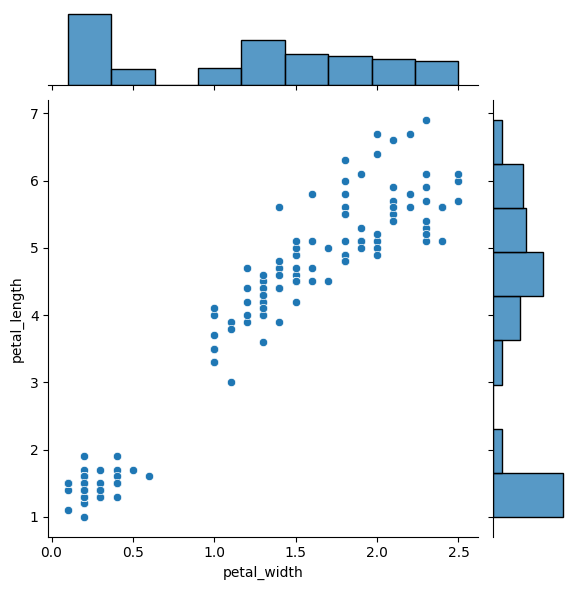

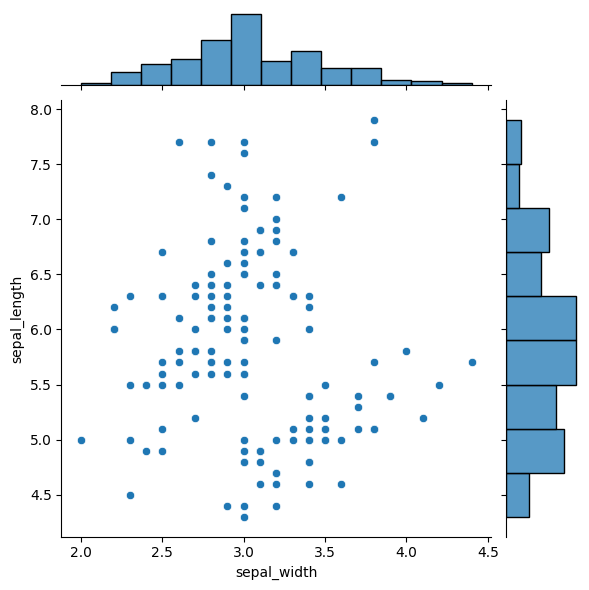

In [135]:
sns.jointplot(x = "petal_width", y = "petal_length", data = dfi)
sns.jointplot(x = "sepal_width", y = "sepal_length", data = dfi)

<div class="intro">

On va faire la même chose que précédemment, mais avec l'option <code>hue</code> (<i>teinte</i>) afin d'attribuer une couleur aux points en fonction de l'espèce d'Iris (variable `species`)
</div>
<div class="introE">

We will do the same thing as before, but with the hue option in order to assign a color to the points according to the `species` of iris
</div>

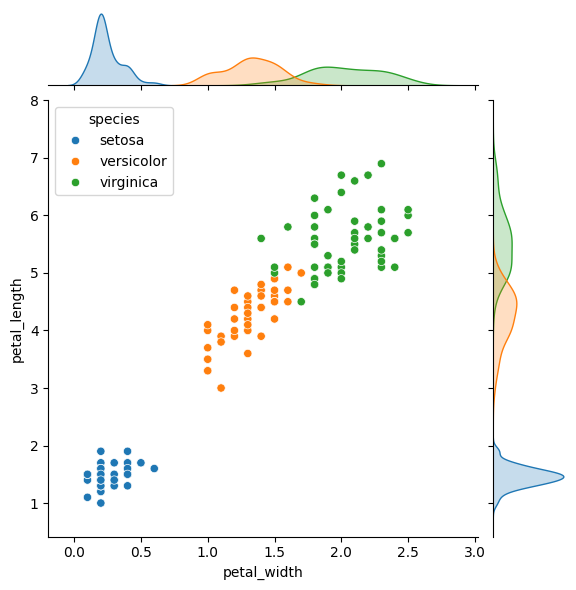

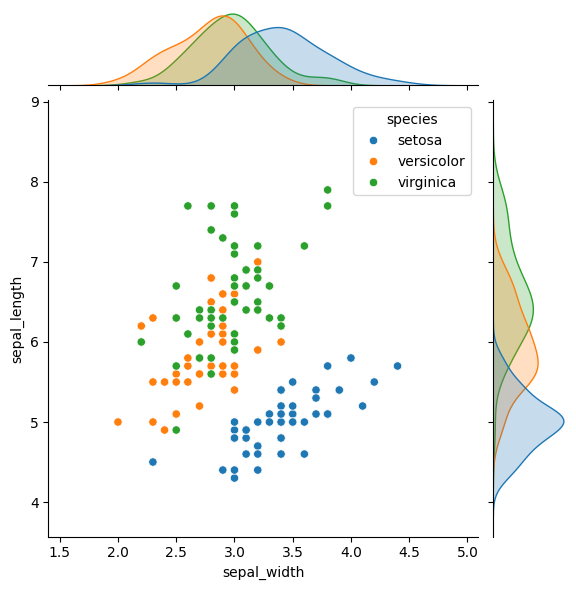

In [136]:
import seaborn as sns
sns.jointplot(x = "petal_width", y = "petal_length", data = dfi, hue="species")
sns.jointplot(x = "sepal_width", y = "sepal_length", data = dfi, hue="species")

<div class="rq">
<li> le <b>résultat marquant</b> est que non seulement il y a corrélation entre longueur et largeur des pétales, mais il y a aussi une claire <b>séparation des espèces</b> qui semblent <span style="color:red"><b>classifiables</b></span> en fonction de la longueur et largeur de leurs pétales (<i>setosa</i> : pétales courts, <i>versicolor</i> : pétales moyens, <i>virginica</i> : pétales longs)<br>
<li> en revanche, les epèces d'Iris <i>versicolor</i> et <i>virginica</i> ont des sépales de longueur et largeur similaires ("mélange" des points verts et orange). Ces 2 propriétés ne sont pas des bons descripteurs permettant de classifier ces variétés d'iris
<br><br>
Cette notion de <b><span style="color:red">classification</span></b> est importante dans la perspective d'utiliser des algorithmes d'intelligence artificielle de type <b>apprentissage automatique (machine learning)</b>.
</div>
<div class="rqE">
<li>the <b>striking result</b> is that not only is there a correlation between length and width of petals, but there is also a clear <b>separation of species</b> that seem to be <span style="color:red"><b>classifiables</b></span> according to the length and width of their petals (<i>setosa</i>: short petals, <i>versicolor</i>: medium petals, <i>virginica</i>: long petals)
<li>on the other hand, the <i>versicolor</i> and <i>virginica</i> species of Iris have sepals of similar length and width ("mix" of green and orange points). These 2 properties are not good descriptors to classify these varieties of iris
<br><br>
    <b><span style="color:red">Classification</span></b> is important in the perspective of using <b>artificial intelligence algorithms such as machine learning</b>
</div>
<br>
<div class="intro">
    Les espèces <i>setosa</i> étant les plus petites, il est immédiat de les identifier et de les sélectionner grâce aux tests conditionnels :
</div>
<div class="introE">
The <i>setosa</i> species being the smallest, it is immediate to identify and select them thanks to conditional tests:
</div>

In [137]:
display(dfi[ (dfi["petal_width"] < 1) & (dfi["petal_length"] < 2)])

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


#### Fonction/*Function* `pairplot` (bibliothèque/*library* seaborn)

<div class="intro">

La fonction `pairplot` permet de simultanément visualiser les corrélations potentielles entre toutes les variables. On retrouve sur la diagonale les histogrammes de distribution de chacune des variables.
</div>
<div class="introE">

The pairplot function allows to simultaneously visualize the potential correlations between all variables. On the diagonal, you can see the distribution histograms of each variable.
</div>

<br>
    
<div class="rq">
<b>Patience !</b> Ce tracé prend un peu de temps
<br>Tant qu'on voit <code>In [*]</code> à gauche de la cellule qu'on est en train d'exécuter, c'est-à-dire avec une * au lieu d'un numéro de sortie, c'est que python est occupé à interpréter la série de commandes de la cellule
</div>
<div class="rqE">
<b>Be patient!</b> This plot takes a little time
<br>As long as you see <code>In [*]</code> on the left of the cell you are executing, <i>i.e.</i> with a * instead of an output number, it means that python is busy interpreting the series of commands in the cell
</div>

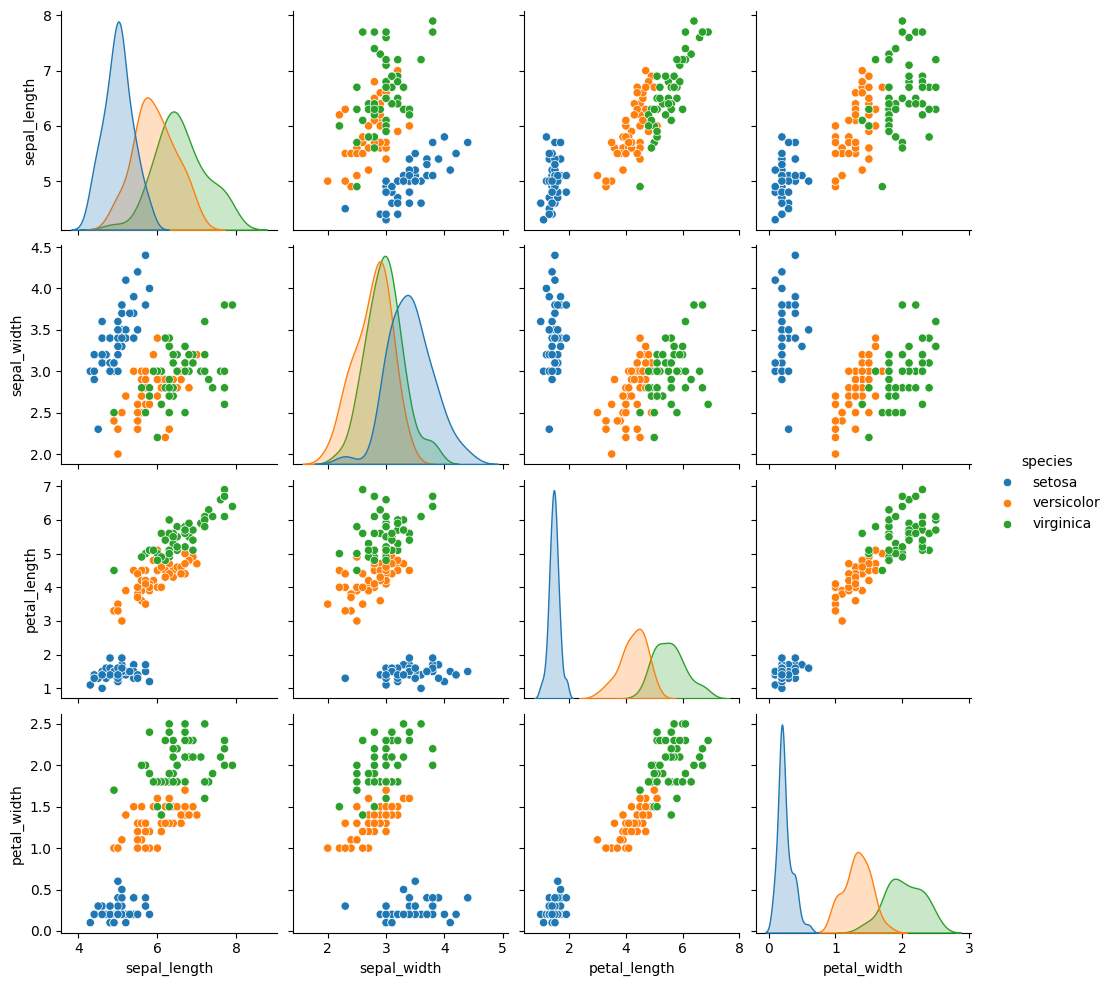

In [138]:
sns.pairplot(dfi,hue='species')

#### Fonctions/*Functions* `corr` (bibliothèque/*library* pandas) `heatmap` (bibliothèque/*library* seaborn)

<div class="intro">

On vient de voir que certaines variables semblent corrélées entre elles, en particulier la longueur et la largeur des pétales. Les **cartes thermiques** (**heatmaps**) font partie de la panoplie du data scientist. Elles permettent de rapidement identifier si des variables sont corrélées entre elles. Il faut pour cela avoir au préalable calculé la matrice de corrélation à l'aide de la fonction  [`corr()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html)

<b>fonction `corr()` </b>
- La valeur de la corrélation va de -1 à +1
- corrélation nulle : deux variables sont indépendantes l’une de l’autre
- corrélation positive : les variables évoluent dans le même sens
- corrélation négative : les variables évoluent en sens contraire
</div>

<div class="introE">

We have just seen that some variables seem to be correlated with each other, in particular the length and width of the petals. **Heatmaps** are part of the data scientist's toolbox. They allow to quickly identify if variables are correlated between them. To do this, you must first calculate the correlation matrix using the [`corr()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html) function

<b>`corr()` function</b>

- The value of the correlation goes from -1 to +1
- zero correlation : two variables are independent of each other
- positive correlation : the variables move in the same direction
- negative correlation : the variables evolve in opposite directions
</div>

In [139]:
display(dfi.corr(numeric_only=True))

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


<div class="intro">
    
On va maintenant visualiser cette carte sous forme graphique, en y reportant ces nombres</div>
<div class="introE">
    
We will now visualize this map in graphical form, by plotting the following figures</div>

<Figure size 800x600 with 0 Axes>

<Axes: >

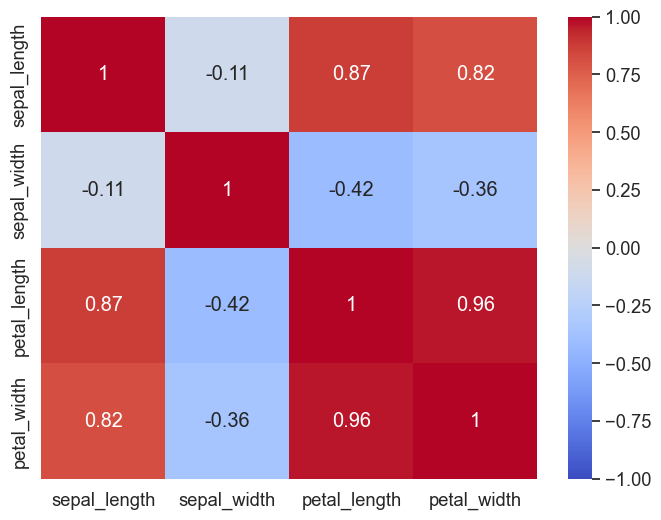

In [140]:
plt.figure(figsize = (8,6))
sns.set(font_scale=1.2)
sns.heatmap(dfi.corr(numeric_only=True), vmin = -1, vmax = +1, annot = True, cmap='coolwarm')

<div class="rq">
    
- il n'y a que des 1 sur la diagonale > <b> normal !</b><i> une variable est forcément corrélée avec elle-même</i>
- il n'y a <i>pas de corrélation significative</i> entre longueur et largeur des sépales (cases bleu clair) 
- il y a <i>proportionalité</i> entre longueur de sépales et longueur et largeur des pétales (cases rouge vif)
- la largeur des sépales est plutôt <i>inversement proportionnelle</i> à la largeur et à la longueur des pétales (cases bleues)

</div>
<div class="rqE"> 
    
- there are only 1's on the diagonal > **this is what is expected!** *a variable is necessarily correlated with itself*
- there is *no significant correlation* between length and width of sepals (light blue boxes)
- there is *proportionality* between length of sepals and length and width of petals (bright red boxes)
- the width of the sepals is rather *inversely proportional* to the width and length of the petals (blue boxes)

</div>

### Bilan de cette première partie<br>*Review of this first part*

<div class="rq">
    
- on vient de voir comment lire un fichier de données à l'aide de la bibliothèque `pandas`
- les fonctions offertes par ce module sont très puissantes, on peut facilement accéder à des informations statistiques sur le contenu fichier, lire et manipuler une colonne entière d'informations, ajouter des informations, etc...
- d'autres modules sont conçus pour travailler avec les `dataframe` de `pandas`, comme par exemple la bibliothèque `seaborn`, qui permet de réaliser des graphiques statistiques en Python
- `seaborn`  aide à explorer et à comprendre les données, elle permet de se concentrer sur la signification d'un graphique, plutôt que sur les détails de son dessin, comme on l'a vu avec graphes de type `pairplot` ou `heatmap`

</div>


<div class="rqE">
    
- we have just seen how to read a data file using the `pandas` library
- the functions offered by this module are very powerful, you can easily access statistical information about the file content, read and manipulate a whole column of information, add information, etc...
- other modules are designed to work with `pandas` `dataframes`, like for example the `seaborn` library, which allows to make statistical graphs in Python
- `seaborn` helps to explore and understand the data, it allows to focus on the meaning of a graph, rather than on the details of its drawing, as we have seen with `pairplot` or `heatmap` graphs
    
</div>

### Chapitre suivant : statistiques et régression<br>*Next chapter: statistics and regression*

<div class="intro">
   
On vient de voir que certaines variables sont corrrélées entre elles, alors que d'autres sont indépendantes.

- Il serait intéressant, dans ce contexte des iris, de déterminer la relation linéaire entre longueur et largeur de pétale. Il faut pour cela appliquer une méthode de **régression linéaire**, aussi appelée **méthode d'ajustement de courbe** ("*curve fitting*"). 
- On pourrait aussi évaluer s'il existe une relation entre le type d'iris d'une part et les longueurs et largeurs des pétales et des sépales d'autre part. On aurait aussi besoin pour cela d'une méthode de régression.

De façon générale, la régression a toute sa place dans une introduction à la science des données. Elle permet d'étudier la relation entre des variables indépendantes (= caractéristiques ou encore descripteurs) et une variable dépendante de ces données (= un résultat ou observation). Elle est utilisée comme méthode de modélisation prédictive dans l'**apprentissage automatique supervisé**, dans lequel un algorithme est utilisé pour **prédire des résultats** à partir de variables indépendantes (par exemple le temps qu'il va faire à court terme à partir de mesures de pression, de température, de vitesse et d'orientation du vent,...). 

On vient de dire que le terme de **régression** est aussi utilisé pour certaines méthodes d’**ajustement de courbe** ("*curve fitting*"). C'est l'objet du [chapitre suivant](./DS4B-Iris2.ipynb).

N'oubliez pas de faire d'abord [l'exercice associé à ce chapitre](./DS4B-Exercices/DS4B-Iris1-Exercice.ipynb).

</div>

<div class="introE">

We have just seen that some variables are correlated, while others are independent.

- It would be interesting, in this context of irises, to determine the linear relationship between petal length and width. To do this, a **linear regression** method, also called **curve fitting**, should be applied.
- One could also evaluate if there is a relationship between the type of iris on the one hand and the length and width of the petals and sepals on the other hand. This would also require a regression method.

Regression has its place in an introduction to data science. It is used to study the relationship between independent variables (= characteristics or descriptors) and a dependent variable of these data (= a sample or observation). It is used as a predictive modeling method in **supervised machine learning**, in which an algorithm is used to **predict outcomes** from independent variables (e.g., short-term weather forecast from measurements of pressure, temperature, wind speed and direction,...).

We have just said that the term **regression** is also used for some **curve fitting** methods. This is the subject of the [next chapter](./DS4B-Iris2.ipynb).

Don't forget to do the [exercise associated with this chapter first](./DS4B-Exercices/DS4B-Iris1-Exercice.ipynb).

</div>

### Évaluation formative après la vidéo


Voir les quizz (uniquement pour les étudiants d'UT3, cf Moodle)

In [141]:
vID.end(cwd0)

**Fin à:** Sunday 03 December 2023, 15:06:51  
**Durée:** 03:20:41 275ms

<p style="text-align: center"><img width="800px" src="./config/svg/logoFin.svg" style="margin-left:auto; margin-right:auto"/></p>